In [19]:
from ftag import Cuts
import puma
import h5py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D


In [9]:

data = h5py.File('/eos/home-a/anmilici/ntupla.h5','r')

'11009 ci piglia'
'213451 ci piglia'
'2133664 ci piglia'
nevent=213451
'123156'
'199'
particles_dict = {
    0: "light-quarks",
    541: "B meson (cb̅)",
    531: "B meson (sb̅)",
    521: "B meson (ub̅)",
    511: "B meson (db̅)",
    551: "bb̅ meson (𝜂-b)",
    553: "bb̅ meson (𝛾)",
    555: "bb̅ meson (Xb2)",
    5122: "bottom baryons (udb)",
    5132: "bottom baryons (ddb)",
    5232: "bottom baryons (usb)",
    5332: "bottom baryons (ssb)",
    431: "D meson (cs̄)",
    421: "D meson (cū)",
    411: "D meson (cđ)",
    441: "cc̄ meson (𝜂-c)",
    443: "cc̄ meson (J/ψ)",
    445: "cc̄ meson (Xc2)",
    4122: "charmed baryons (udc)",
    4132: "charmed baryons (dsc)",
    4232: "charmed baryons (usc)",
    4332: "charmed baryons (ssc)",
    4322: "charmed baryons (usc)",
    15: "tau-quarks (τ)"
}
type_dict = {
    0: "NoTruth",
    1: "Other",
    2: "Pi",
    3: "Kaon",
    4: "Lambda",
    5: "Electron",
    6: "Muon",
    7: "Photon"
}

In [10]:


jet=data['jets'][nevent]
tracks=data['tracks'][nevent]

n_tracks=jet['n_tracks']
initial_parton=jet['PartonTruthLabelID']       #parton based labelling of the jet
cone_flavour=jet['HadronConeExclTruthLabelID'] #hadron based labelling of the jet
cone_flavour_ext=jet['HadronConeExclExtendedTruthLabelID']
hadr_id=jet['HadronConeExclTruthLabelPdgId']   #pdg id of hadron in the jet with charge

print("Number of tracks in the jet=",n_tracks)
print("Parton that originated the jet=",initial_parton)
print("Cone labelling respect to hadrons=",cone_flavour)
print("Cone labelling respect to hadrons extended=",cone_flavour_ext)
print("hadron id=",particles_dict[np.abs(hadr_id)],"({})".format(hadr_id))
print("charge of hadron=",np.sign(hadr_id))

track_source=tracks['ftagTruthSourceLabel'][:n_tracks]
track_type=tracks['ftagTruthTypeLabel'][:n_tracks]
track_origin=tracks['ftagTruthOriginLabel'][:n_tracks]
track_vertex_index=tracks['ftagTruthVertexIndex'][:n_tracks]


track_origin_GN2=tracks['GN2v01_aux_TrackOrigin'][:n_tracks]
track_vertex_index_GN2=tracks['GN2v01_aux_VertexIndex'][:n_tracks]

print("tracks vertex index ",track_vertex_index)
print("tracks origins ",track_origin)
#print('tracks sources',track_source)
print("\n")
print("tracks vertex index GN2 prediction" ,track_vertex_index_GN2)
print("track origins GN2 prediction",track_origin_GN2)


Number of tracks in the jet= 4
Parton that originated the jet= 5
Cone labelling respect to hadrons= 5
Cone labelling respect to hadrons extended= 5
hadron id= B meson (ub̅) (-521)
charge of hadron= -1
tracks vertex index  [10 23 -2  0]
tracks origins  [3 4 0 2]


tracks vertex index GN2 prediction [0 1 2 3]
track origins GN2 prediction [3 4 0 2]


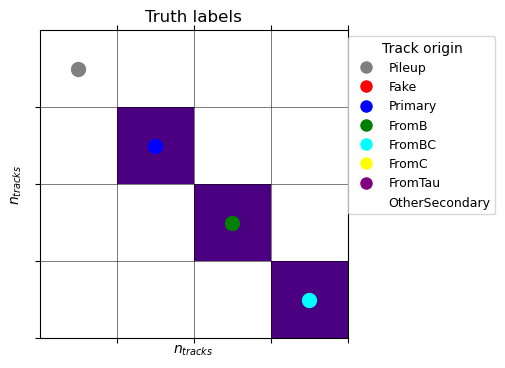

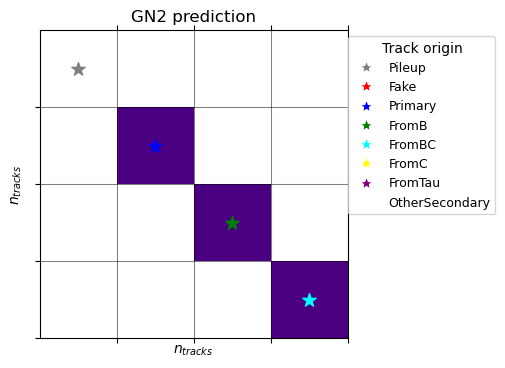

In [11]:
def create_block_matrix(n_tracks:int,
                        track_origin:np.ndarray,
                        track_vertex_index:np.ndarray,
                        mode:np.string_='truth'):

    if mode=='prediction':
      marker='*'
    elif mode=='truth':
      marker='o'

    sorted_track_origin=np.sort(track_origin)
    indices = np.argsort(track_origin)
    #sorted_track_vertex_index=np.sort(track_vertex_index)
    sorted_track_vertex_index=track_vertex_index[indices]

    matrix = np.zeros((n_tracks,n_tracks))

    vertex_label,vertex_sizes = np.unique(sorted_track_vertex_index, return_counts=True)

    start = 0
    for size in vertex_sizes:
        end = start + size
        if sorted_track_origin[start]==0:
          matrix[start:end, start:end] = 0
        else:
          matrix[start:end, start:end] = 1
        start = end

    fig, ax = plt.subplots(figsize=(4, 4))
    colors = ['white', 'indigo']
    cmap = ListedColormap(colors)

    ax.matshow(matrix[:,:], cmap=cmap, extent=(n_tracks, 0, 0, n_tracks))

    colori={0:"gray",1:"red",2:"blue",3:"green",4:"cyan",5:"yellow",6:"purple",7:"white"}
    categories={0:"Pileup",1:"Fake",2:"Primary",3:"FromB",4:"FromBC",5:"FromC",6:"FromTau",7:"OtherSecondary"}

    #print(sorted_track_vertex_index)
    #print(vertex_sizes)

    # Aggiungi i pallini su ogni elemento della diagonale dei blocchi
    start = 0
    k=0
    for i, size in enumerate(vertex_sizes):
        end = start + size

        # Itera sugli elementi della diagonale del blocco
        for j in range(start, end):

            ax.scatter( n_tracks-j - 0.5, n_tracks - j - 0.5, color=colori[sorted_track_origin[k]].format(),marker=marker, s=100)
            k=k+1

        start = end

    ax.set_xticks(np.arange(0, n_tracks))
    ax.set_yticks(np.arange(0, n_tracks))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(which="both", color="black", linestyle="-", linewidth=0.75,alpha=0.5)
    ax.set_xlabel(r'$n_{tracks}$')
    ax.set_ylabel(r'$n_{tracks}$')
    if mode=='truth':
      ax.set_title('Truth labels')
    elif mode=='prediction':
      ax.set_title('GN2 prediction')

    #faccio la legenda
    categories = ["Pileup","Fake","Primary","FromB","FromBC","FromC","FromTau","OtherSecondary"]
    colors = [ "gray","red","blue","green","cyan","yellow","purple", "white"]

    legend_elements = [Line2D([0], [0], marker=marker.format(), color='w', markerfacecolor=color, markersize=10, label=category)
                       for color, category in zip(colors, categories)]

    ax.legend(handles=legend_elements,bbox_to_anchor=(1.50, 1),title='Track origin', fontsize=9, title_fontsize=10)

    return fig

truth_matrix = create_block_matrix(n_tracks, track_origin,track_vertex_index,'truth')
prediction_matrix=create_block_matrix(n_tracks, track_origin_GN2,track_vertex_index_GN2,'prediction')

truth_matrix.savefig("truth_matrix.png")
prediction_matrix.savefig("prediction_matrix.png")

# Let's try to have a better look in this event

In [12]:
tracks=np.copy(tracks[0:n_tracks])
tracks_from_primary=tracks[track_vertex_index==0]

In [13]:
#let's look inside first secondary vertex (fromB)

tracks_fromB=tracks[track_vertex_index==11]
child_hadron=jet['HadronConeExclTruthLabelChildPdgId']

types=tracks_fromB['ftagTruthTypeLabel']
map_func = np.vectorize(lambda x: type_dict[x])

print("q over p of tracks associated to this vertex",tracks_fromB['qOverP'])
print("types of particle with",types)

types=map_func(np.abs(types))
print(types)
print("child hadron=",child_hadron,"(D0bar)")


q over p of tracks associated to this vertex []
types of particle with []


ValueError: cannot call `vectorize` on size 0 inputs unless `otypes` is set

In [ ]:
tracks_from_secondB=tracks[track_vertex_index==15]
types=tracks_from_secondB['ftagTruthTypeLabel']
map_func = np.vectorize(lambda x: type_dict[x])
print("particle with sign",types)
types=map_func(np.abs(types))
print("type of particle",types)
print('q over p',tracks_from_secondB['qOverP'])


In [ ]:
#So what we understand from this is that a B+ decays in pi+,pi-,pi+,pi- and a D0bar. Let's look what the D0 decays in
tracks_fromBC=tracks[track_vertex_index==21]
BC_types=tracks_fromBC['ftagTruthTypeLabel']
print(BC_types)
BC_types=map_func(np.abs(BC_types))
print(BC_types)
tracks_fromBC['ftagTruthOriginLabel']

# pt of tracks

In [14]:
all_tracks=data['tracks'][0:2000000]


min pt= 0.5 GeV 
max pt= 585340.16 GeV


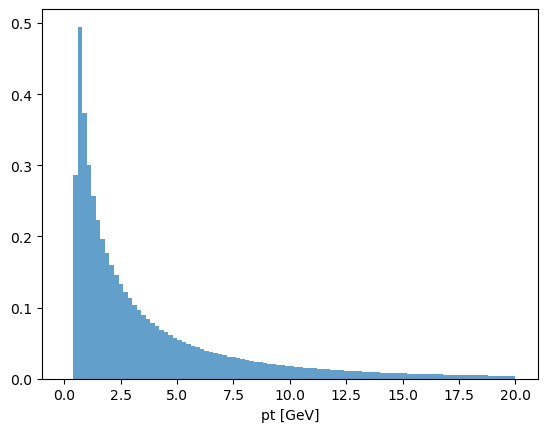

In [15]:
tracks_pt=all_tracks['pt']
tracks_pt=np.copy(tracks_pt[~np.isnan(tracks_pt)])
pt_min=np.min(tracks_pt)
pt_max=np.max(tracks_pt)
print('min pt=',(pt_min/1000).round(4),'GeV \nmax pt=',(pt_max/1000).round(4),'GeV')
h_pt=plt.hist(tracks_pt/1000,bins=100,range=(0,20),density=True,alpha=0.7)
plt.xlabel('pt [GeV]')
plt.show()



/tmp/anmilici/ipykernel_211918/2821156536.py:17: RuntimeWarning: divide by zero encountered in true_divide
  ratio = h2 / (h1 )


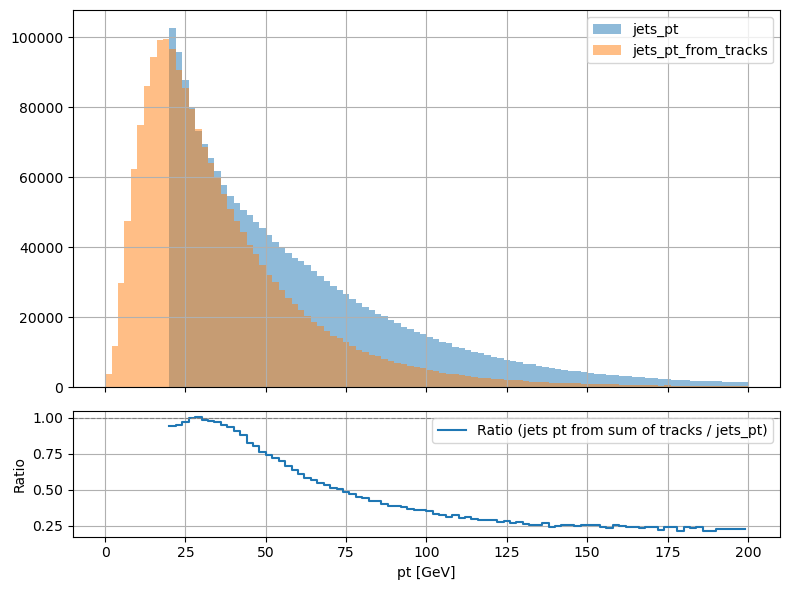

In [16]:
all_jets=data['jets'][0:2000000]
jets_pt=all_jets['pt']
jets_pt_from_tracks=[]
for i in range(len(jets_pt)):
  n=all_jets['n_tracks'][i]
  sum_of_track=np.sum(all_tracks['pt'][i][0:n])
  jets_pt_from_tracks.append(sum_of_track)


bins = np.linspace(0, 200, 101)  # 100 intervalli tra 0 e 200

h1,_=np.histogram(jets_pt/1000, bins=bins, range=(0, 201), density=False)
h2,_=np.histogram(np.array(jets_pt_from_tracks)/1000, bins=bins, range=(0, 201), density=False)

bin_centers = (bins[:-1] + bins[1:]) / 2

ratio = h2 / (h1 )

fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8, 6), sharex=True)
# Primo subplot: istogrammi
axs[0].hist(jets_pt / 1000, bins=bins, density=False, alpha=0.5, label='jets_pt')
axs[0].hist(np.array(jets_pt_from_tracks) / 1000, bins=bins, density=False, alpha=0.5, label='jets_pt_from_tracks')

axs[0].legend()
axs[0].grid(True)

# Secondo subplot: ratio
axs[1].step(bin_centers, ratio, where='mid', label='Ratio (jets pt from sum of tracks / jets_pt)')
axs[1].set_xlabel('pt [GeV]')
axs[1].set_ylabel('Ratio')
axs[1].axhline(1, color='gray', linestyle='--', linewidth=0.8)
axs[1].legend()
axs[1].grid(True)

# Mostra il grafico
plt.tight_layout()
plt.show()
fig.savefig("pt_ratio.png")

In [20]:
from ftag.hdf5 import H5Reader
data = reader.load({"jets": ["pt", "eta"], "tracks": ["deta", "dphi"]}, num_jets=100)
data["tracks"].dtype


NameError: name 'reader' is not defined